### 빰빠바 빰빰빠 빰빠라밤!! 
대망의 첫번째 노드를 시작합니다! 우와우와~~ㅎㅎ

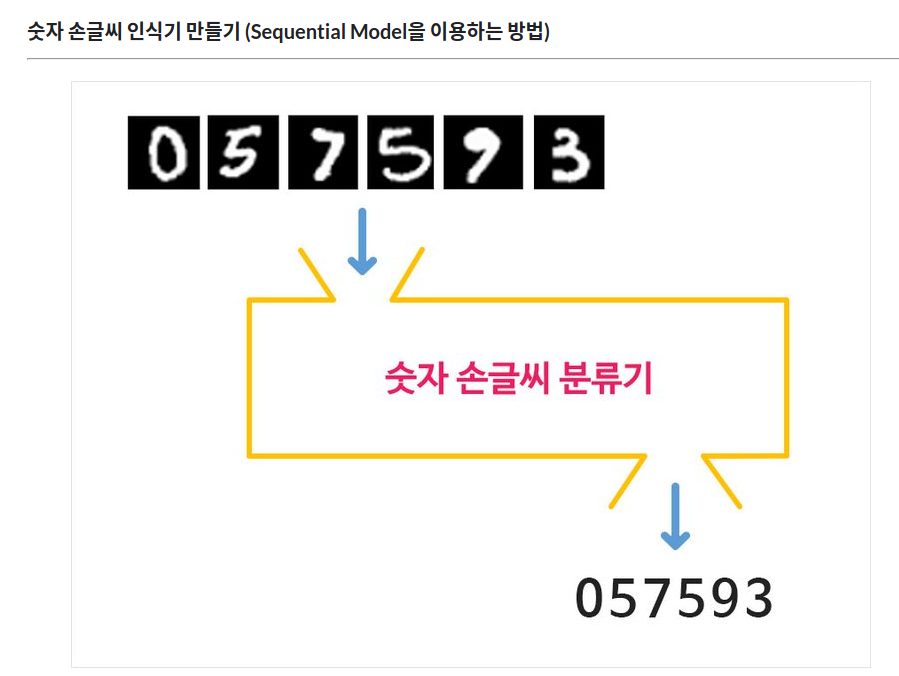
오늘은 이미지를 넣으면 숫자로 분류해주는 분류기를 만들어 보도록 하겠습니다.   

#### 만드는 순서 
**데이터 준비 > 딥러닝 네트워크 설계 > 학습 > 테스트(평가)

이제 첫번째 데이터를 준비해보도록 하겠습니다.    
일단 모으기보다는 잘 모아져 있는 곳에서 데이터를 수집하도록 하겠습니다.   
일단 tensorflow를 불러 이미지를 달라고 해볼까요?ㅎ

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist =keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(len(x_train))

2.2.0
60000


In [2]:
# 아주 잘 불러왔네요. 그럼 데이터가 어떻게 생겼나 확인해 봐야겠죠? 
print(y_train[1])

0


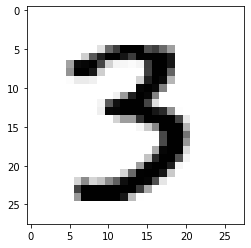

10001 번째 이미지의 숫자는 바로 3 입니다.


In [3]:
index = 10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print((index+1),'번째 이미지의 숫자는 바로', y_train[index],'입니다.')

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### 데이터 전처리하기 
손글씨의 실제 픽셀 값은 0~255사이의 값을 가집니다. 

255까지 학습하기보다는 머신러닝에서는 계산량을 줄이기 위해 0~1 사이의 값으로 정규화시켜주는게 좋습니다. 

In [5]:
print('최소값',np.min(x_train),'최대값',np.max(x_train))

최소값 0 최대값 255


In [6]:
x_train_norm, x_test_norm = x_train /255, x_test/255
print('최소값',np.min(x_train_norm),'최대값',np.max(x_train_norm))

최소값 0.0 최대값 1.0


### 딥러닝 네트워크 설계하기 
sequential Model을 사용해 봅시다.  Lenet을 사용해보겠습니다. 

In [7]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
print('model에 추가된 layer 개수:',len(model.layers))

model에 추가된 layer 개수: 7


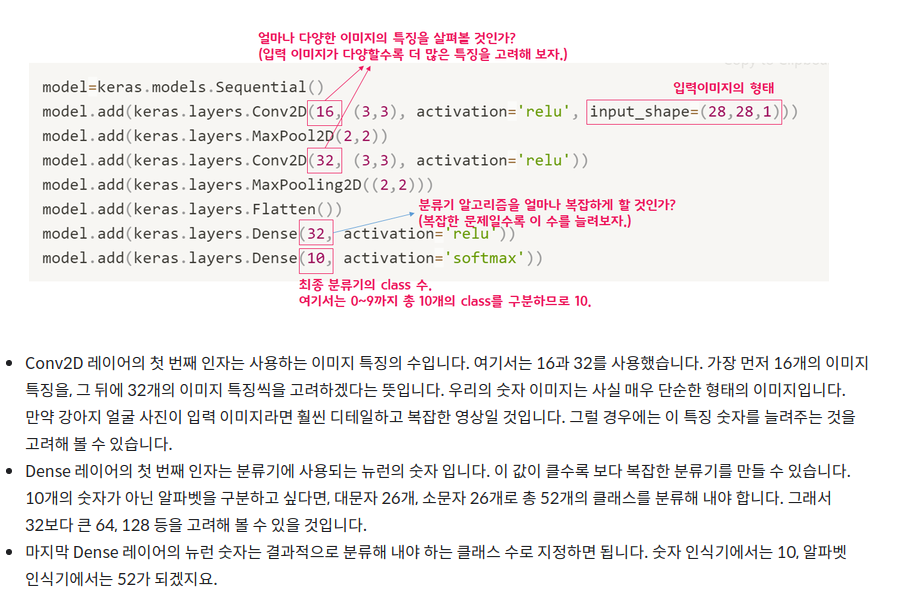

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

### 딥러닝 네트워크 학습시키기 

우리가 만든 네트워크의 입력은(데이터갯수, 이미지크기 x, 이미지크기 y, 채널수) 4차원으로 나와야 합니다.  
그런데 우리가 tensorflow에서 받은 데이터를 확인해 봤던 (x_train.shape)은 (60000,28,28)로 나왔습니다.   
그렇다면 네트워크에 넣기위해 4차원으로 만들어보도록 해요! 

In [9]:
print('Before Reshape -x_train_norm_shape:{}'.format(x_train_norm.shape))
print('Before Reshape -x_test_norm_shape:{}'.format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1,28,28,1) #-1로 써 놓으면 자동계산됩니다.
x_test_reshaped = x_test_norm.reshape(-1,28,28,1)

print('after reshape-x_train_reshaped shape:{}'.format(x_train_reshaped.shape))
print('after reshape-x_test_reshaped shape:{}'.format(x_test_reshaped.shape))

Before Reshape -x_train_norm_shape:(60000, 28, 28)
Before Reshape -x_test_norm_shape:(10000, 28, 28)
after reshape-x_train_reshaped shape:(60000, 28, 28, 1)
after reshape-x_test_reshaped shape:(10000, 28, 28, 1)


### 이제 x_train 학습데이터로 딥러닝 네트워크를 학습시켜 봅시다.  
학습은 model.compile()코드를 이용합니다.   
optimizer는 adam을 사용하고 분류문제이기에 sparse_categorical_crossentropy를 사용하도록 하겠습니다. 

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_reshaped, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1940 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

### 성능측정

모델을 학습은 모두 완료되었습니다. 그렇다면 우리 모델이 얼마나 잘 만들어졌는지 확인해보도록 하겠습니다.  
바로!test data를 사용하겠습니다. 

In [11]:
test_loss, test_accuracy =model.evaluate(x_test_reshaped,y_test, verbose=2)
print('test_loss:{}'.format(test_loss))
print('test_Accuracy:{}'.format(test_accuracy))

313/313 - 2s - loss: 0.0352 - accuracy: 0.9892
test_loss:0.03521989285945892
test_Accuracy:0.9891999959945679


#### train보다 test시에 데이터의 정확도가 떨어졌네요. 어떤 데이터를 잘 못 추론했는지 확인해 보겠습니다. 
model.predict()함수를 사용해서 실제로 어떻게 추론했는지 확률분포를 확인해 보겠습니다. 

In [12]:
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result,axis=1)

idx=0
print('model.predict()결과:',predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과:',predicted_labels[idx])
print('실제 데이터의 라벨:',y_test[idx])

model.predict()결과: [3.4538977e-10 3.7081729e-09 4.0824834e-06 1.2195095e-08 4.5994542e-10
 2.3758594e-11 2.1163031e-15 9.9999511e-01 5.2847982e-10 8.2898617e-07]
model이 추론한 가장 가능성이 높은 결과: 7
실제 데이터의 라벨: 7


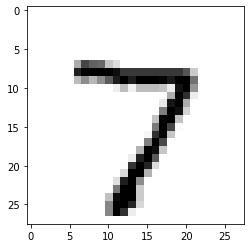

In [13]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포:[3.4696621e-10 9.3871000e-10 4.7063939e-14 2.6167926e-09 1.3736767e-01
 7.6499718e-06 1.2432757e-09 1.5819298e-06 2.3832349e-07 8.6262286e-01]
라벨:4,예측결과:9


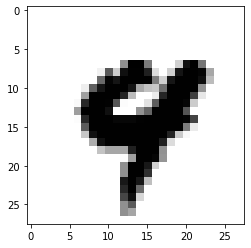

예측확률분포:[1.5681650e-07 1.0378093e-09 9.9505123e-06 6.7662328e-01 5.2661816e-12
 3.7975822e-09 6.2149440e-05 2.4313291e-09 3.2330370e-01 8.0511302e-07]
라벨:8,예측결과:3


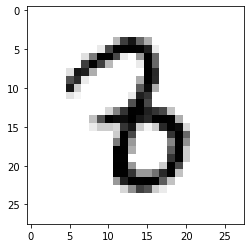

예측확률분포:[2.1491120e-07 1.1394414e-03 6.7017496e-02 9.9909909e-02 3.9121881e-02
 3.3060756e-01 6.9304146e-02 6.7861715e-06 3.9289013e-01 2.3786085e-06]
라벨:5,예측결과:8


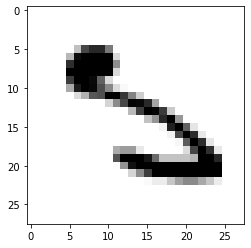

예측확률분포:[3.4696621e-10 9.3871000e-10 4.7063939e-14 2.6167926e-09 1.3736767e-01
 7.6499718e-06 1.2432757e-09 1.5819298e-06 2.3832349e-07 8.6262286e-01]
라벨:4,예측결과:9


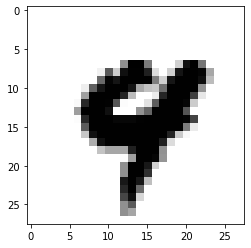

예측확률분포:[5.02108257e-08 1.13676194e-07 5.18498631e-08 5.49163401e-01
 1.18291418e-10 4.50753480e-01 3.32306081e-05 1.02160620e-07
 4.94577253e-05 8.35189056e-08]
라벨:5,예측결과:3


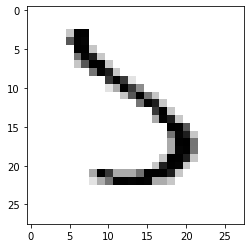

In [15]:
import random 
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i]!=y_test[i]:
        wrong_predict_list.append(i)

samples=random.choices(population=wrong_predict_list, k=5)

# for n in samples:
#     print("예측확률분포: " + str(predicted_result[n]))
#     print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
#     plt.imshow(x_test[n], cmap=plt.cm.binary)
#     plt.show()

for n in samples:
    print('예측확률분포:'+str(predicted_result[n]))
    print('라벨:'+str(y_test[n])+',예측결과:'+str(predicted_labels[n]))

    plt.imshow(x_test[n], cmap=plt.cm.binary)

    plt.show()

In [18]:
n_channel_1=16
n_channel_2=32
n_dense=40
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                32040     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               